# Plot Processed Lightcurve

Plot a filtered and interpolated lightcurve

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ztfrapid import ztf_rapid

You will need to install 'emcee' if you wish to train your own classifier on new data.


In [2]:
input_filepath = '/home/nmiranda/workspace/ztf_rapid/data/processed/test_none/test_none.npz'
files = np.load(input_filepath, allow_pickle=True)

In [3]:
idx = 175
files['objids_test'][idx]

'1_ZTF19aamvmer'

In [4]:
this_lc = files['orig_lc_test'][idx]
timesX_test = files['timesX_test'][idx]
X_test = files['X_test'][idx]

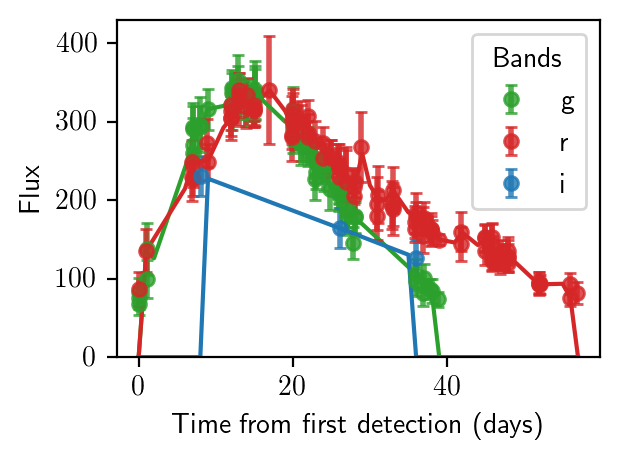

In [5]:
fig = ztf_rapid.plot_processed_lightcurve(this_lc, timesX_test, X_test)

In [6]:
fig.savefig('/home/nmiranda/workspace/ztf_rapid/reports/figures/ZTF19aaksrlb_processed.svg')